In [1]:
import numpy as np
import pandas as pd
df= pd.read_excel("C:\\Users\\RAM\\Downloads\\innercity.xlsx")
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [2]:
#drop unnecessary columns
df.drop(['cid','sight','long','lat'], axis=1, inplace=True)

dayhours              0
price                 0
room_bed            108
room_bath           108
ceil                 72
coast                31
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [73]:
#We have special character '$' in our data, replacing those with NaN
for columns in df.columns:
    df[columns]=df[columns].replace('$',np.nan)

In [74]:
#calculating NaN for each column
df.isnull().sum()

dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [75]:
#handling with null values
cat_columns=['room_bed', 'room_bath', 'ceil', 'coast', 'condition', 'quality', 'yr_built', 'furnished']
for i in cat_columns:
    df[i]=df[i].fillna(df[i].mode()[0])
    
num_columns=['living_measure','lot_measure','ceil_measure','basement','living_measure15','lot_measure15','total_area']
for i in num_columns:
    df[i]=df[i].fillna(df[i].mean())
    
#double checking NaN
df.isnull().any()

dayhours            False
price               False
room_bed            False
room_bath           False
living_measure      False
lot_measure         False
ceil                False
coast               False
condition           False
quality             False
ceil_measure        False
basement            False
yr_built            False
yr_renovated        False
zipcode             False
living_measure15    False
lot_measure15       False
furnished           False
total_area          False
dtype: bool

In [76]:
df['room_bath'].unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75, 5.  , 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25, 6.  ,
       0.  , 1.25, 5.75, 7.5 , 6.5 , 0.5 , 7.75, 6.25])

In [77]:
df['room_bath'].value_counts()

2.50    5466
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

In [78]:
df['coast'].value_counts()

0.0    21452
1.0      161
Name: coast, dtype: int64

In [79]:
#some categorical coulmns are not perfect (its not possible to have rooms or floors in float like 1.5 or 2.75)
#so making perfect categories
df['ceil']=df['ceil'].apply(np.ceil)
df['room_bath']=df['room_bath'].apply(np.ceil)

In [80]:
#while handling with nullvalues int datapoints changed to float
#converting float to int
flt_columns=['room_bed', 'room_bath', 'ceil', 'coast', 'condition', 'quality', 'yr_built', 'furnished','living_measure','lot_measure','ceil_measure', 'basement','living_measure15','lot_measure15','total_area']
for columns in flt_columns:
    df[columns]=df[columns].apply(np.int64)

In [81]:
#creating date format
df['dayhours']=df['dayhours'].map(lambda x: str(x)[:-7])
df['dayhours'] = pd.to_datetime(df['dayhours'], format='%Y%m%d')

Text(0, 0.5, 'count')

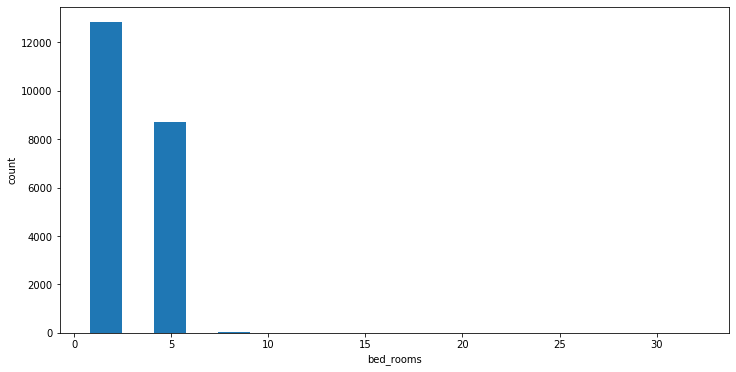

In [82]:
#finding outliers
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,6)
plt.hist(df.room_bed,rwidth=0.5)
plt.xlabel('bed_rooms')
plt.ylabel('count')

In [83]:
df['room_bed'].value_counts()

3     9875
4     6854
2     2747
5     1595
6      270
1      197
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

Text(0, 0.5, 'count')

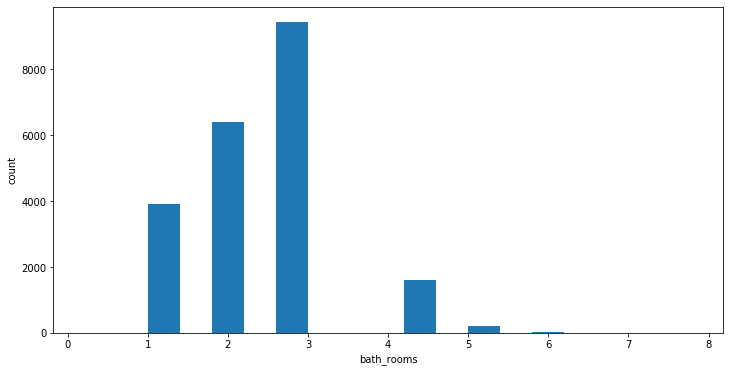

In [84]:
plt.rcParams['figure.figsize']=(12,6)
plt.hist(df.room_bath,rwidth=0.5)
plt.xlabel('bath_rooms')
plt.ylabel('count')

In [85]:
df['room_bed'].value_counts()

3     9875
4     6854
2     2747
5     1595
6      270
1      197
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

In [86]:
#houses with more than 6 bed room and 5 bath room is not common. So, considering those as outliers and removing
df=df[df.room_bed <=6]
df=df[df.room_bath <=5]

#houses with 0 bed room and 0 bath room is not possible. So, removing those unusual rows
df=df[df.room_bed !=0]
df=df[df.room_bath !=0]

In [87]:
#no of bath rooms more that number of bed rooms is quiet unusual. So considering them as outliers and removing
df=df[df.room_bath<df.room_bed+1]

In [88]:
df.shape

(20666, 19)

In [89]:
df.head(3)

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,total_area
0,2015-04-27,600000,4,2,3050,9440,1,0,3,8,1800,1250,1966,0,98034,2020,8660,0,12490
1,2015-03-17,190000,2,1,670,3101,1,0,4,6,670,0,1948,0,98118,1660,4100,0,3771
2,2014-08-20,735000,4,3,3040,2415,2,1,3,8,3040,0,1966,0,98118,2620,2433,0,5455


In [90]:
X=df.drop(['price','dayhours'], axis='columns')

In [91]:
y=df.price

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [93]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [94]:
model.score(X_test,y_test)

0.6349528270739355

In [96]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
cross_val_score(model, X, y, cv=cv)

array([0.61975025, 0.62407762, 0.62745495, 0.63897211, 0.61329648])

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [105]:
def best_model(X,y):
    model_params={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse', 'friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    score=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
    for algo_name, config in model_params.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        score.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(score,columns=['model','best_score','best_params'])

In [106]:
best_model(X,y)

C:\Users\RAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330325560814340.8, tolerance: 182382543636.4511
  positive)
C:\Users\RAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340304829552602.8, tolerance: 187084543974.33926
  positive)
C:\Users\RAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332133603828429.2, tolerance: 182462771292.87247
  positive)
C:\Users\RAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33

,model,best_score,best_params
0,linear_regression,0.624710,{'normalize': False}
1,lasso,0.624695,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.594358,"{'criterion': 'mse', 'splitter': 'best'}"


In [3]:
df['yr_built'].value_counts()

2014.0    559
2006.0    454
2005.0    450
2004.0    433
2003.0    421
         ... 
1933.0     30
1901.0     29
1902.0     27
1935.0     24
1934.0     21
Name: yr_built, Length: 116, dtype: int64

In [4]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [9]:
df[df.room_bath>df.room_bed+1]

,dayhours,price,room_bed,room_bath,ceil,coast,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,total_area
1068,20141013T000000,7700000,6.0,8.00,2.5,0.0,4.0,13.0,8570.0,3480.0,1910.0,1987,98102,3940.0,8800.0,1.0,39650.0
1245,20140617T000000,4670000,5.0,6.75,1.0,1.0,3.0,12.0,4820.0,4820.0,1983.0,2009,98040,3270.0,10454.0,1.0,22708.0
1372,20140908T000000,360000,1.0,2.25,1.5,0.0,3.0,7.0,1560.0,500.0,1927.0,1983,98003,2060.0,11880.0,0.0,12660.0
1874,20141210T000000,1060000,4.0,5.25,2.0,0.0,3.0,11.0,4140.0,0.0,2005.0,0,98075,4440.0,15523.0,1.0,18897.0
1921,20150507T000000,1080000,2.0,3.25,3.0,1.0,3.0,8.0,1550.0,0.0,2006.0,0,98075,2710.0,3444.0,0.0,3317.0
2770,20141023T000000,315000,1.0,2.25,2.0,0.0,4.0,7.0,1100.0,840.0,1979.0,0,98133,1580.0,5100.0,0.0,4490.0
3177,20140520T000000,458000,1.0,2.25,1.0,0.0,3.0,7.0,1470.0,670.0,1976.0,0,98072,1980.0,8400.0,0.0,12490.0
3286,20141117T000000,339950,0.0,2.50,2.0,0.0,3.0,8.0,2290.0,0.0,1985.0,0,98042,2500.0,8751.0,0.0,10609.0
3534,20140625T000000,995000,3.0,4.50,NaN,NaN,3.0,9.0,3720.0,660.0,1968.0,1990,98166,2460.0,18512.0,1.0,51424.0
3653,20140528T000000,474800,2.0,3.25,3.0,0.0,3.0,8.0,1400.0,0.0,2000.0,0,98103,1400.0,1335.0,0.0,2643.0


In [10]:
df['yr_renovated'].values_counts()

AttributeError: 'Series' object has no attribute 'values_counts'